# Bias Mitigation Analysis - StudentsPerformance

In [2]:
data_name = 'StudentsPerformance'

In [3]:
from analysis_utils import *
%matplotlib inline

In [4]:
# define desired metric for the use case
ACC_METRIC = 'avg_norm_mcc_score'
FAIR_METRIC = 'abs_avg_spd_score'

In [5]:
import os
import pandas as pd
import numpy as np
results_all = pd.DataFrame()
dir_path = './{}_results/'.format(data_name)
for file in os.listdir(dir_path):
    print(file)
    result = pd.read_pickle(dir_path+file)
    results_all = pd.concat([results_all, result])

StudentsPerformance_results_GB
StudentsPerformance_results_LR
StudentsPerformance_results_NB
StudentsPerformance_results_RF
StudentsPerformance_results_SVM
StudentsPerformance_results_TabTrans


In [6]:
print(results_all.shape)
results_all.head(2)

(960, 19)


,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,avg_spd_score,avg_aod_score,avg_eod_score,avg_ford_score,avg_ppvd_score,avg_(1-consistency_score),avg_gei_score,avg_ti_score,cost
0,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.3,0.616,0.622530,0.546249,0.66776,0.236350,0.618175,0.082723,0.069458,0.115999,-0.061833,0.029942,0.3648,0.143179,0.192623,0.464548
1,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.4,0.649,0.615374,0.501187,0.66776,0.233474,0.616737,0.030607,0.011313,0.091105,-0.117102,0.051441,0.3300,0.178282,0.248114,0.413870


In [7]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
avg_group_fairness_metrics = ['avg_'+col for col in group_fairness]

In [8]:
results_all_converted = results_all.copy(deep=True).reset_index(drop=True)
for col in avg_fairness_metrics:
    abs_col_name = 'abs_'+col
    results_all_converted[abs_col_name] = results_all_converted[col].abs()
# round threshold since 0.4 was 0.399999999 
results_all_converted.threshold = round(results_all_converted.threshold,2)
# base estimator invariant in-processing methods shouldn't have any parameter value
results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in']),['param']] = ''

In [9]:
base_invariant = results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in'])]
for base in results_all_converted.base_estimator.unique():
    if results_all_converted[(results_all_converted.base_estimator==base)\
                             &((results_all_converted.Bias_Mitigation=='AD')|(results_all_converted.Bias_Mitigation=='LFR_in'))].shape[0]==0:
        dup = base_invariant.copy()
        dup['base_estimator'] = dup['base_estimator'].replace({'LR':base})
        results_all_converted = pd.concat([results_all_converted, dup])
results_all_converted.head()

,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,...,avg_ti_score,cost,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
0,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.3,0.616,0.622530,0.546249,0.66776,0.236350,0.618175,...,0.192623,0.464548,0.082723,0.069458,0.115999,0.061833,0.029942,0.3648,0.143179,0.192623
1,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.4,0.649,0.615374,0.501187,0.66776,0.233474,0.616737,...,0.248114,0.413870,0.030607,0.011313,0.091105,0.117102,0.051441,0.3300,0.178282,0.248114
2,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.5,0.662,0.592077,0.420902,0.66776,0.211260,0.605630,...,0.304850,0.406662,0.012292,0.002639,0.051587,0.127417,0.025793,0.2594,0.211674,0.304850
3,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.6,0.669,0.577883,0.354424,0.66776,0.207010,0.603505,...,0.336879,0.418918,0.022423,0.019964,0.030640,0.075904,0.000058,0.1970,0.226694,0.336879
4,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.7,0.658,0.541043,0.207464,0.66776,0.144559,0.572279,...,0.389049,0.451257,0.023536,0.025385,0.014398,0.129167,0.012797,0.1120,0.253686,0.389049


In [10]:
results_all_converted.base_estimator.value_counts()

GB          200
LR          200
NB          200
RF          200
SVM         200
TabTrans    160
Name: base_estimator, dtype: int64

In [11]:
# BEST MODELS
scoring = (ACC_METRIC,FAIR_METRIC,1,1)
w_acc = scoring[2]
w_fair = scoring[3]
acc_cost = 1-results_all_converted[ACC_METRIC]
fair_cost = abs(results_all_converted[FAIR_METRIC])

results_all_converted['cost'] = w_acc*acc_cost + w_fair*fair_cost
best_models = results_all_converted.sort_values(by='cost')[['base_estimator','param','Bias_Mitigation','threshold',
                                                            ACC_METRIC,FAIR_METRIC,'cost']].drop_duplicates(subset='cost').head(10)
best_models.rename({ACC_METRIC: 'Norm. MCC',
                    FAIR_METRIC: 'Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper()}, axis=1, inplace=True)
best_models.columns = [col if best_models.columns.get_loc(col) in [4,5]\
                       else col.replace('_',' ').title() for col in best_models.columns] 
f = {best_models.columns[i]:'{:.4f}' for i in range(-3,0)}
f.update({'Threshold':'{:.1f}'})
styled_best_models = best_models.style.format(f).hide(axis="index")
print(styled_best_models.to_latex(hrules=True, label="table:results_{}".format(data_name),
                                  caption="Top 5 Models for {}".format(data_name)).replace('_','\_'))
display(styled_best_models)

\begin{table}
\caption{Top 5 Models for StudentsPerformance}
\label{table:results\_StudentsPerformance}
\begin{tabular}{lllrrrr}
\toprule
Base Estimator & Param & Bias Mitigation & Threshold & Norm. MCC & Abs. SPD & Cost \\
\midrule
LR & {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} & RW & 0.4 & 0.7148 & 0.0017 & 0.2869 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'saga'} & RW & 0.4 & 0.7158 & 0.0038 & 0.2880 \\
LR & {'C': 10, 'penalty': 'l2', 'solver': 'saga'} & RW+ROC & 0.4 & 0.7127 & 0.0019 & 0.2891 \\
LR & {'C': 10, 'penalty': 'l2', 'solver': 'saga'} & RW+ROC & 0.3 & 0.7207 & 0.0120 & 0.2913 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} & None & 0.4 & 0.7149 & 0.0062 & 0.2913 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'saga'} & None & 0.4 & 0.7145 & 0.0064 & 0.2918 \\
SVM & {'gamma': 'scale', 'kernel': 'linear'} & ROC & 0.3 & 0.7126 & 0.0051 & 0.2925 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} & RW & 0.3 & 0.7135 & 0.0074 & 0.2939 \\
LR & {'C': 1, 'penalt

Base Estimator,Param,Bias Mitigation,Threshold,Norm. MCC,Abs. SPD,Cost
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",RW,0.4,0.7148,0.0017,0.2869
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",RW,0.4,0.7158,0.0038,0.2880
LR,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",RW+ROC,0.4,0.7127,0.0019,0.2891
LR,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",RW+ROC,0.3,0.7207,0.0120,0.2913
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.4,0.7149,0.0062,0.2913
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",None,0.4,0.7145,0.0064,0.2918
SVM,"{'gamma': 'scale', 'kernel': 'linear'}",ROC,0.3,0.7126,0.0051,0.2925
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",RW,0.3,0.7135,0.0074,0.2939
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",RW,0.3,0.7165,0.0109,0.2945
SVM,"{'gamma': 'scale', 'kernel': 'linear'}",RW,0.3,0.7154,0.0109,0.2956


In [12]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]

## Analysis like in Chen et al. (2023)

In [13]:
diff_dict = {}
for base in results_all_converted.base_estimator.unique():
    None_table = results_all_converted[(results_all_converted.base_estimator==base)&
                                       (results_all_converted.Bias_Mitigation=='None')].reset_index(drop=True)
    diff_dict[base] = {}
    for BM in results_all_converted[results_all_converted.base_estimator==base].Bias_Mitigation.unique():
        if BM == 'None': pass
        else: 
            # print(BM)
            BM_subtable = results_all_converted[(results_all_converted.base_estimator==base)&
                                                (results_all_converted.Bias_Mitigation==BM)].reset_index(drop=True)
            diff_table = BM_subtable.iloc[:,:4]
            diff_table = pd.concat([diff_table,BM_subtable.iloc[:,4:].subtract(None_table.iloc[:,4:])], axis=1)
            diff_dict[base][BM] = diff_table

In [14]:
df = pd.DataFrame()
for base in diff_dict.keys():
    sub_df = pd.concat(diff_dict[base])
    df = pd.concat([df, pd.concat(diff_dict[base])])
df

base_estimator                                              param  \
RW 0              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   1              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   2              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   3              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   4              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
...              ...                                                ...   
AD 15       TabTrans                                                      
   16       TabTrans                                                      
   17       TabTrans                                                      
   18       TabTrans                                                      
   19       TabTrans                                                      

      Bias_Mitigation  threshold  avg_acc_score  avg_bacc_score  avg_f1_score  \
RW 0               RW        0.3         -0.002        0.000281      0.000202   
   1               RW        0.4          0.002       -0.003366     -0.009712   
   2               RW        0.5         -0.002       -0.003377     -0.007182   
   3               RW        0.6          0.001       -0.001014     -0.007212   
   4               RW        0.7          0.004        0.001791     -0.002599   
...               ...        ...            ...             ...           ...   
AD 15              AD        0.3          0.227        0.172376      0.146299   
   16              AD        0.4          0.237        0.180886      0.187699   
   17              AD        0.5          0.214        0.153302      0.188336   
   18              AD        0.6          0.188        0.106809      0.096036   
   19              AD        0.7          0.112        0.043360     -0.023501   

       avg_auc_score  avg_mcc_score  avg_norm_mcc_score  ...  avg_ti_score  \
RW 0       -0.002140       0.000900            0.000450  ...     -0.002656   
   1       -0.002140      -0.002982           -0.001491  ...      0.008112   
   2       -0.002140      -0.007420           -0.003710  ...      0.003945   
   3       -0.002140      -0.000052           -0.000026  ...      0.003072   
   4       -0.002140       0.015641            0.007820  ...      0.000463   
...              ...            ...                 ...  ...           ...   
AD 15       0.225997       0.344444            0.172222  ...      0.008186   
   16       0.225997       0.366462            0.183231  ...     -0.002701   
   17       0.225997       0.331455            0.165727  ...      0.007994   
   18       0.225997       0.285650            0.142825  ...      0.054834   
   19       0.225997       0.181619            0.090810  ...      0.063523   

           cost  abs_avg_spd_score  abs_avg_aod_score  abs_avg_eod_score  \
RW 0  -0.029973          -0.029523          -0.027168          -0.024377   
   1   0.009414           0.007923           0.016317          -0.014070   
   2   0.015766           0.012056           0.017882          -0.014211   
   3   0.000089           0.000063          -0.004664           0.006035   
   4  -0.007585           0.000235          -0.001072           0.005584   
...         ...                ...                ...                ...   
AD 15 -0.139296           0.032926           0.029781           0.024687   
   16 -0.122184           0.061047           0.070146           0.038046   
   17 -0.156916           0.008812           0.017156          -0.021693   
   18 -0.123616           0.019209           0.028164           0.009354   
   19 -0.067311           0.023498           0.036876          -0.016489   

       abs_avg_ford_score  abs_avg_ppvd_score  abs_avg_(1-consistency_score)  \
RW 0             0.000337            0.010026                        -0.0134   
   1            -0.043691           -0.020906                        -0.0144   
   2            -0.075673           -0.022

In [15]:
(df.iloc[:,4:10]>0).sum()/df.shape[0]

avg_acc_score         0.328846
avg_bacc_score        0.297115
avg_f1_score          0.297115
avg_auc_score         0.340385
avg_mcc_score         0.290385
avg_norm_mcc_score    0.290385
dtype: float64

In [16]:
(df[df.Bias_Mitigation=='RW'].avg_norm_mcc_score>0).value_counts(normalize=True)

True     0.558333
False    0.441667
Name: avg_norm_mcc_score, dtype: float64

### Accuracy Behavior After Bias Mitigations

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,36,32,36,23,30,30
small,0,0,1,1,0,0
medium,3,1,5,1,0,0
large,13,19,10,27,22,22


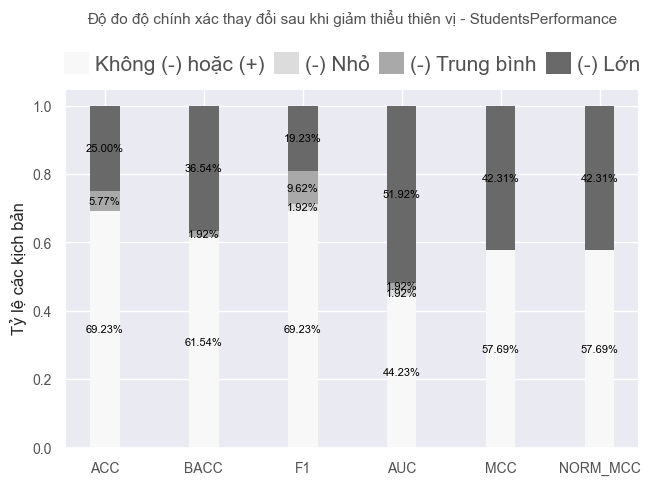

In [17]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Độ đo độ chính xác thay đổi sau khi giảm thiểu thiên vị - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

,RW,LFR_pre,EGR,ROC,CEO,RW+ROC,RW+CEO,LFR_in,AD
noorincrease,6,0,2,6,2,6,2,1,5
small,0,0,0,0,0,0,0,0,0
medium,0,0,0,0,0,0,0,0,0
large,0,5,3,0,4,0,4,5,1


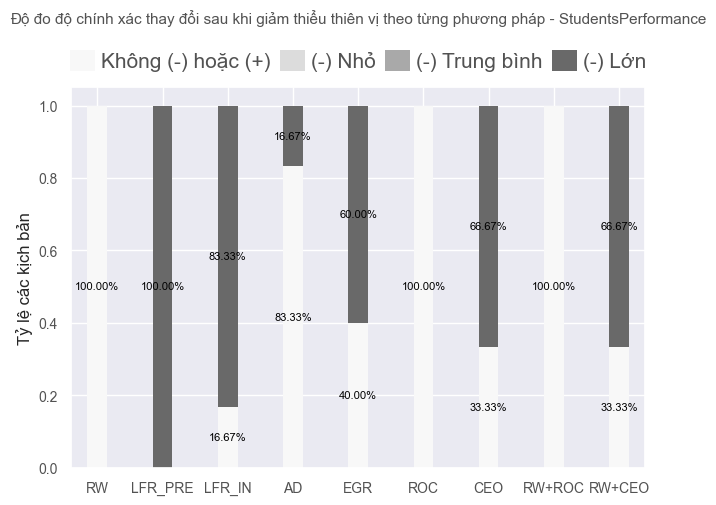

In [18]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Độ đo độ chính xác thay đổi sau khi giảm thiểu thiên vị theo từng phương pháp - {}', figsize=(8, 6))

In [19]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Accuracy Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Accuracy Behavior After Bias Mitigations per base

,GB,LR,NB,RF,SVM,TabTrans
noorincrease,4,3,4,5,7,7
small,0,0,0,0,0,0
medium,0,0,0,0,0,0
large,5,6,5,4,2,0


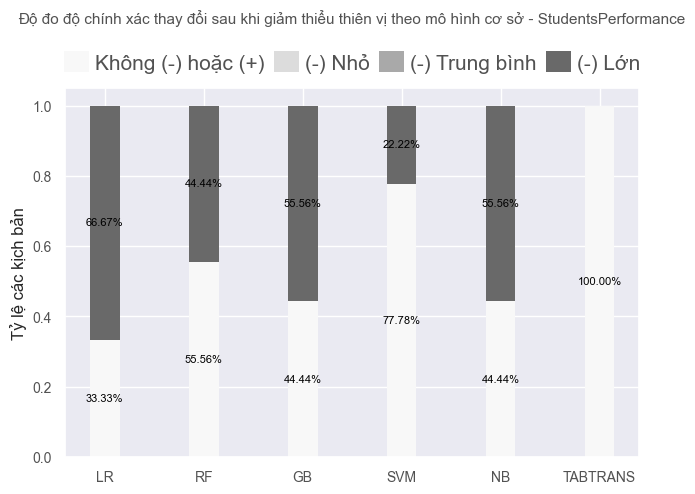

In [20]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Độ đo độ chính xác thay đổi sau khi giảm thiểu thiên vị theo mô hình cơ sở - {}', figsize=(8, 6))

In [21]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='base')
# plot_behaviour_analysis(table, data_name, category='base', caption='Accuracy Change after applying Bias Mitigations per Base ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations

,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
noorincrease,43,42,42,41,46,37,52,52
small,0,0,1,0,0,0,0,0
medium,0,2,0,2,0,4,0,0
large,9,8,9,9,6,11,0,0


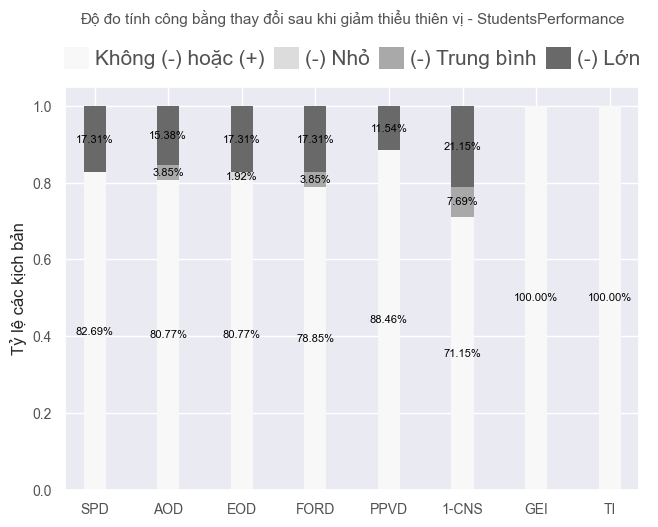

In [22]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Độ đo tính công bằng thay đổi sau khi giảm thiểu thiên vị - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

,RW,LFR_pre,EGR,ROC,CEO,RW+ROC,RW+CEO,LFR_in,AD
noorincrease,6,5,4,6,6,6,6,0,4
small,0,0,0,0,0,0,0,0,0
medium,0,0,0,0,0,0,0,0,0
large,0,0,1,0,0,0,0,6,2


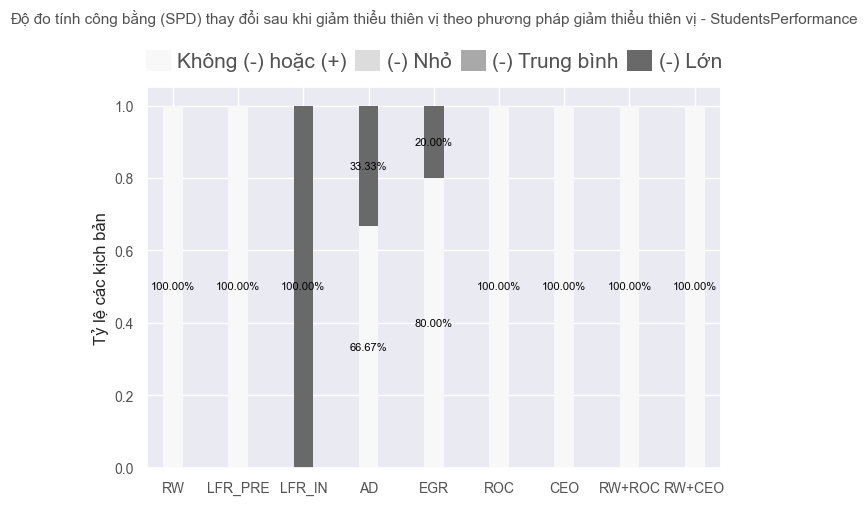

In [23]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Độ đo tính công bằng (%s) thay đổi sau khi giảm thiểu thiên vị theo phương pháp giảm thiểu thiên vị - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

In [24]:
# abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Fairness Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations per base

,GB,LR,NB,RF,SVM,TabTrans
noorincrease,8,8,6,7,8,6
small,0,0,0,0,0,0
medium,0,0,0,0,0,0
large,1,1,3,2,1,1


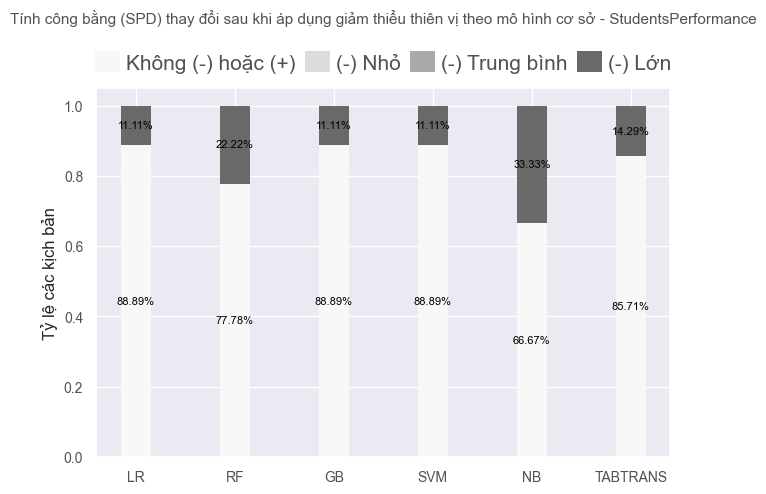

In [25]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Tính công bằng (%s) thay đổi sau khi áp dụng giảm thiểu thiên vị theo mô hình cơ sở - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

## Accuracy vs. Fairness

### General Results

(slope > 0: trade-off)
We can see from the graphs below:

1. Overall trend: the higher the accuracy, the lower the group fairness (positive slope)
2. But the choice of metrics does matter:
    - group fairness: ford_score showcased no "trade-offs"
    - accuracy metrics: f1_score and roc_auc_score showed milder "trade-offs"
    - same fairness metric combined with different accuracy metrics can present both positive/negative relations, vice versa

In [26]:
import matplotlib.pyplot as plt

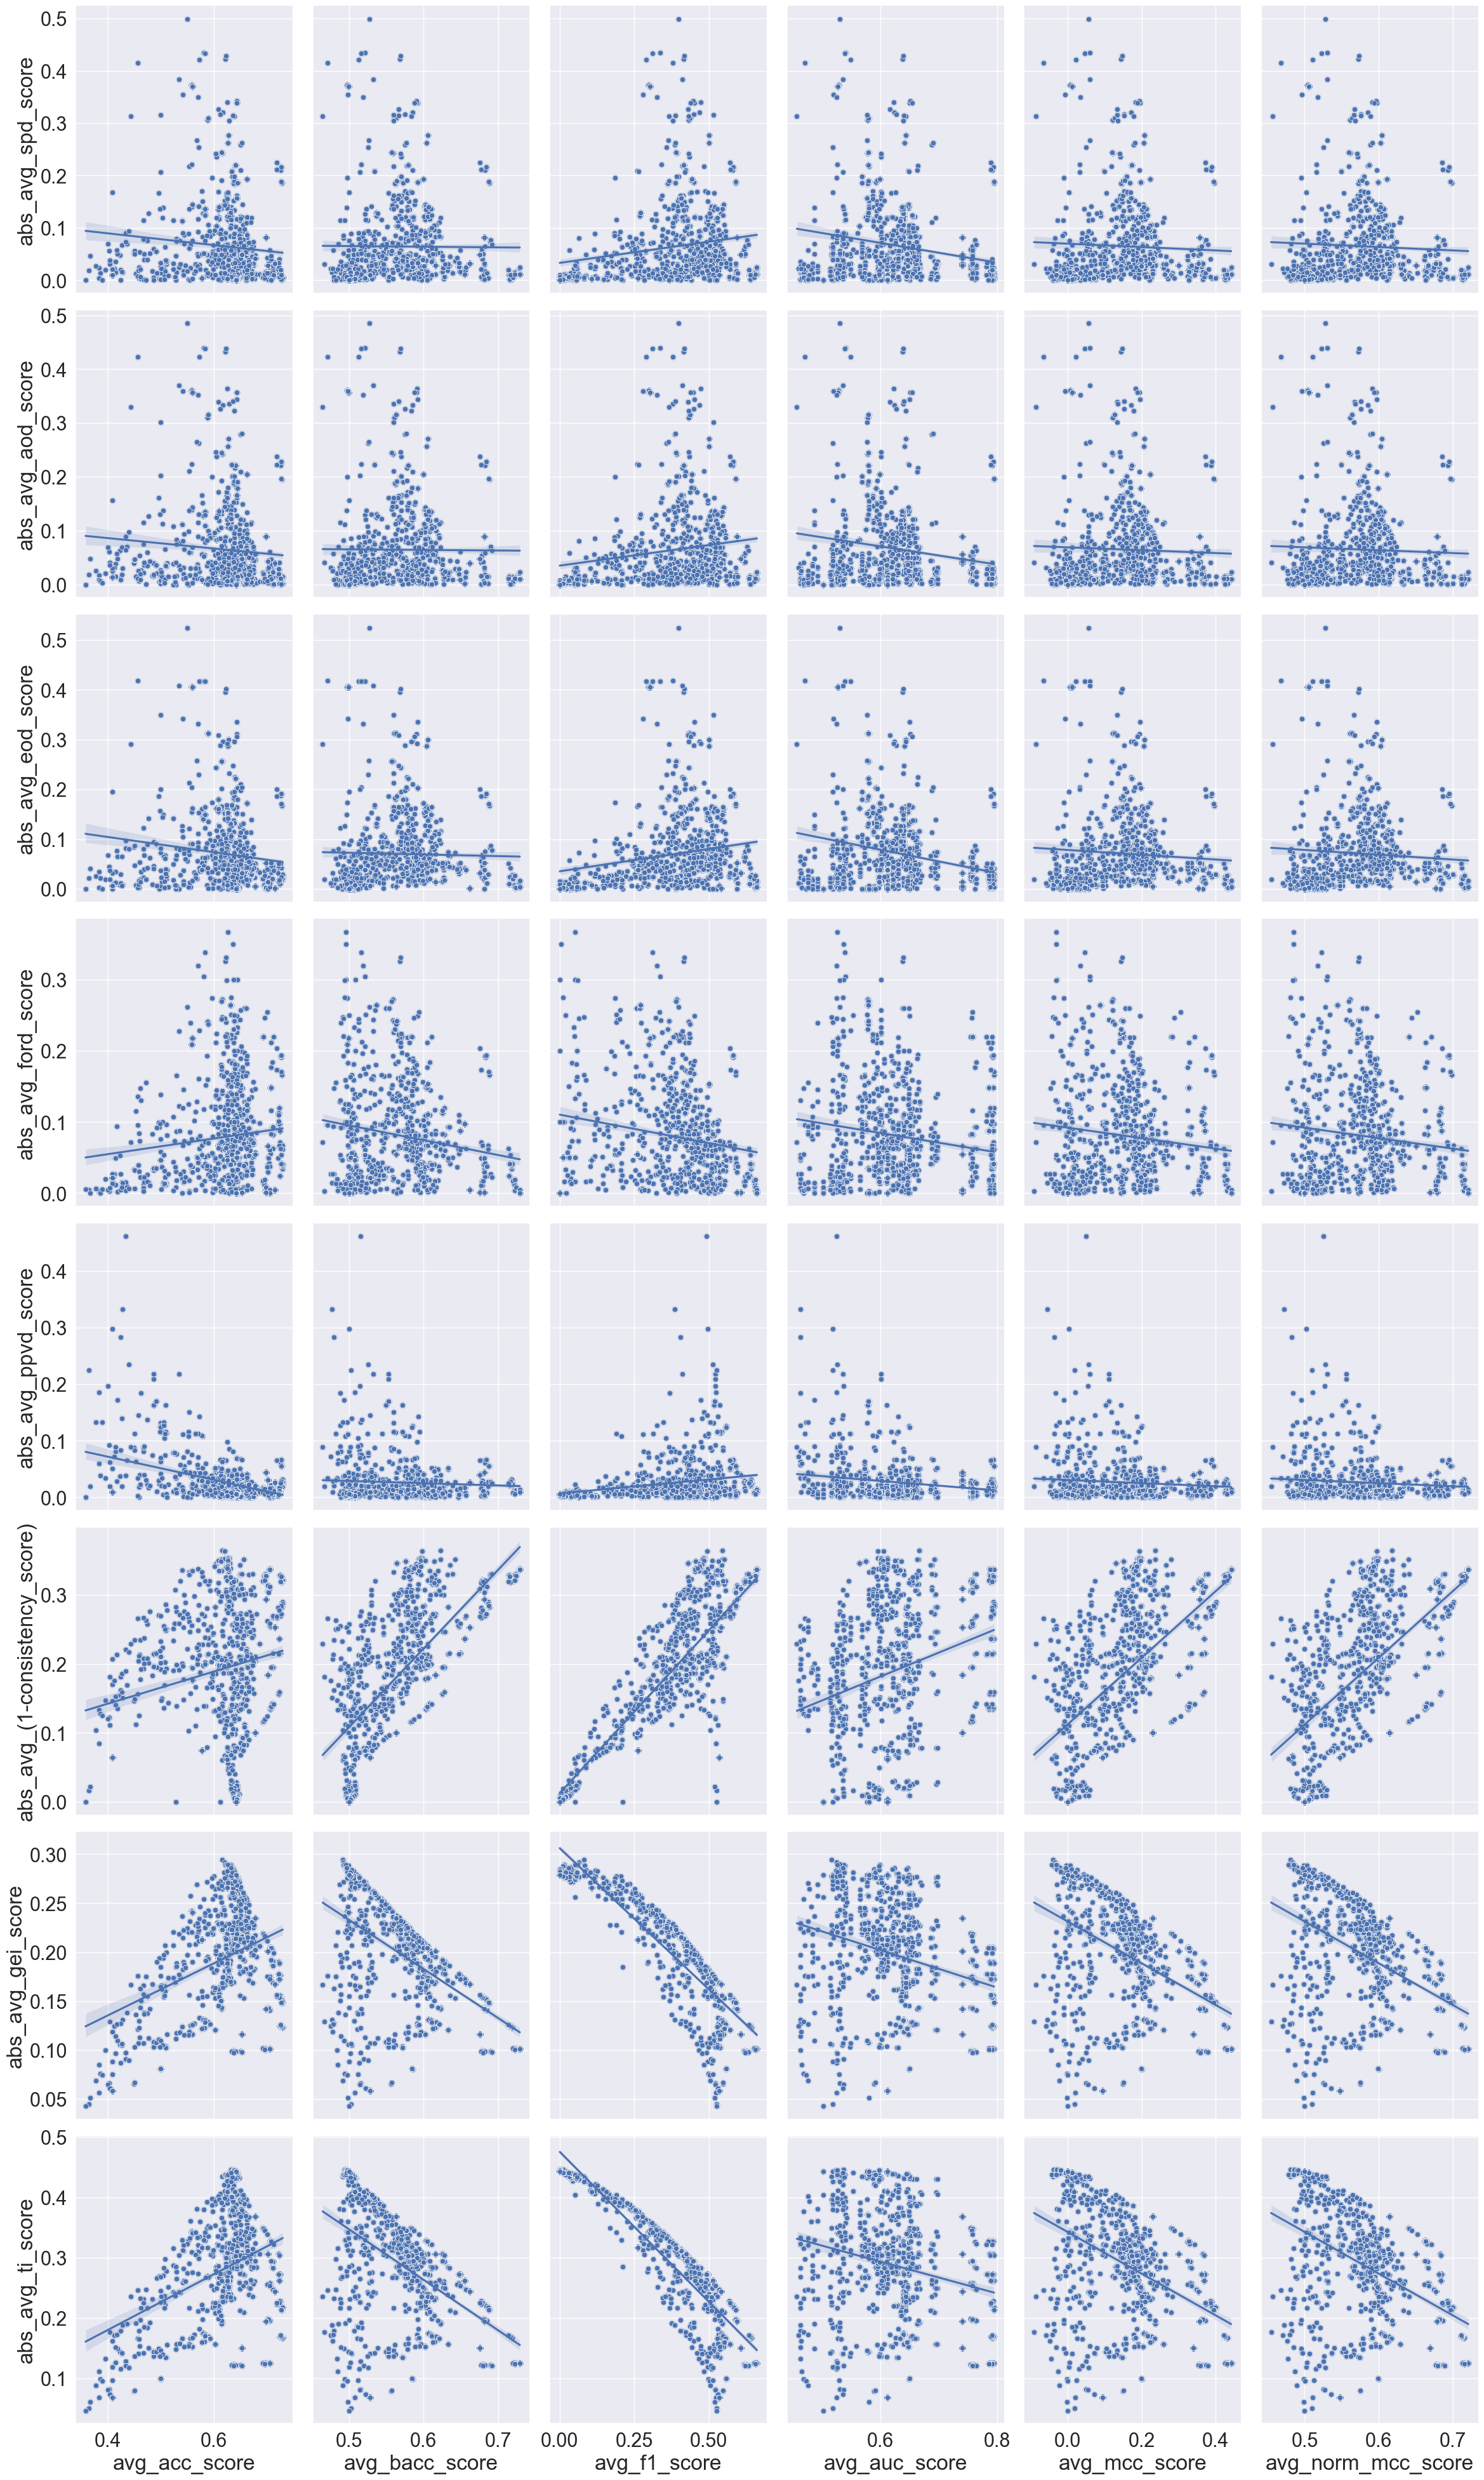

In [27]:
# Set plot font
plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.serif':'Times New Roman'})

sns.set(font_scale = 2)
abs_fairness_metrics = ['abs_'+col for col in avg_fairness_metrics]
g = sns.pairplot(data=results_all_converted, x_vars=avg_accuracy_metrics, y_vars=abs_fairness_metrics,
             height=5, aspect=.8, kind="reg")
g.map(sns.scatterplot)

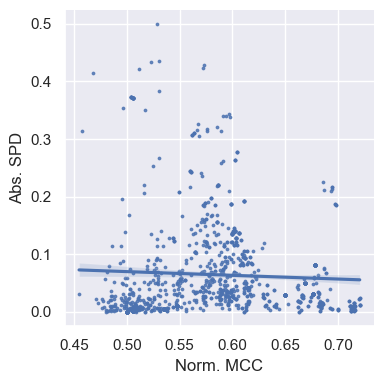

In [28]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, height=4, scatter_kws={'s':3})
# .fig.suptitle("Graph (a)")
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_general'+'.png', bbox_inches='tight')

### Base_estimator specific Results

We can see from the graphs below:
1. Different base_estimators can also generate very different results:
    - SVM (red) the least robust, while "NB" manifest clear trend
    - base_estimators divided into two groups when it comes to consistency_score: tree-based, ensemble (trade-offs) vs non tree-based, non ensemble

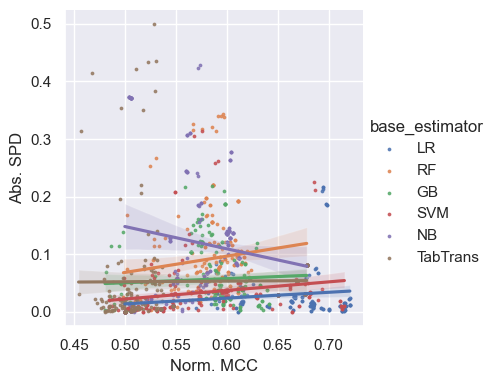

In [29]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='base_estimator',
               hue_order = ['LR','RF','GB','SVM','NB','TabTrans'], height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_Base'+'.png', bbox_inches='tight')

### Threshold specific Results

We can see from the graphs below:

1. Using different threshold also yiels different results:
    - most obvious with (f1_score, group_fairness) combinations

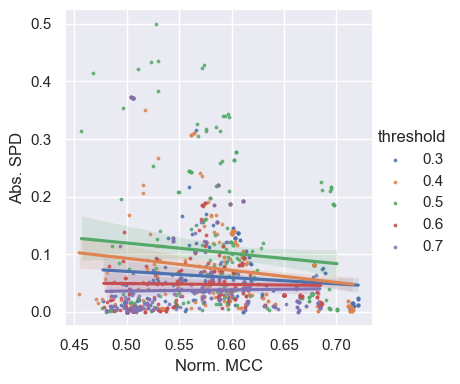

In [30]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

Consideration: put in Appendix?

In [31]:
# for threshold in sorted(results_all_converted.threshold.unique()):
#     sns.set(font_scale = 1)
#     g = sns.lmplot(data=results_all_converted[results_all_converted.threshold==threshold], x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4)
#     ax = plt.gca()
#     ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
#     # save plot
#     g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

### Bias_mitigation specific Results

We can see from the graphs below:

1. Results are clearly divided into two groups
2. Generally with wide C.I.

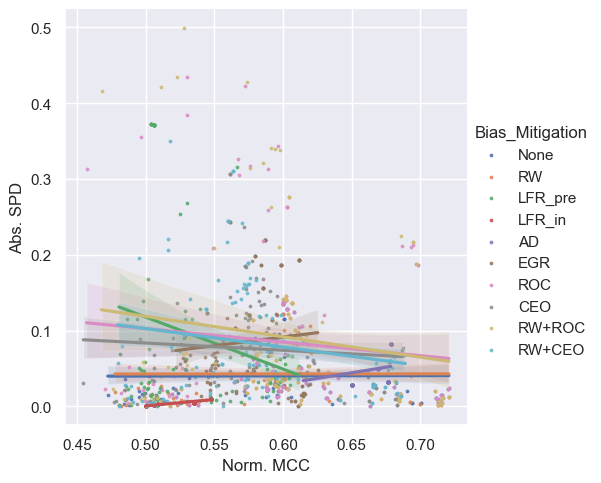

In [32]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='Bias_Mitigation', 
               hue_order=['None','RW','LFR_pre','LFR_in','AD','EGR','ROC','CEO','RW+ROC','RW+CEO'],
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM'+'.png', bbox_inches='tight')

### Bias Mitigation Category

In [33]:
bm_category = {'PRE':['RW', 'LFR_pre'],
               'IN': ['LFR_in','AD','EGR'],
               'POST':['ROC','CEO'],
               'PRE+POST':['RW+ROC','RW+CEO']}

In [34]:
results_all_converted['BM_Category'] = results_all_converted['Bias_Mitigation'].replace({v: k for k, l in bm_category.items()\
                                                                                         for v in l})
results_all_converted[['Bias_Mitigation','BM_Category']].drop_duplicates()

,Bias_Mitigation,BM_Category
0,None,None
5,RW,PRE
10,LFR_pre,PRE
15,EGR,IN
20,ROC,POST
25,CEO,POST
30,RW+ROC,PRE+POST
35,RW+CEO,PRE+POST
175,LFR_in,IN
180,AD,IN


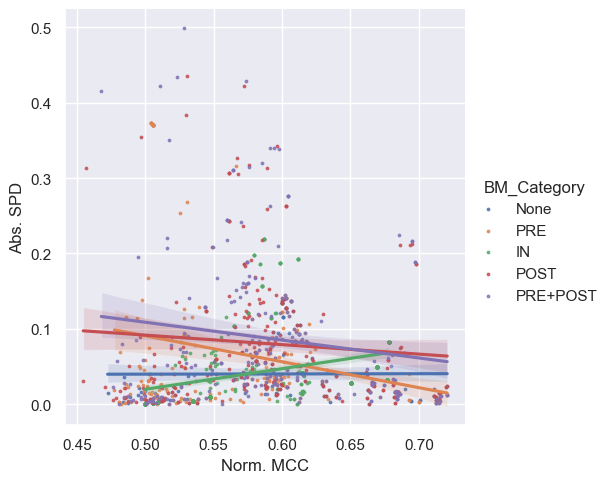

In [35]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='BM_Category', 
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM_Category'+'.png', bbox_inches='tight')

## Heatmap

No clear trend between group and individual fairness with a few exceptions

In [36]:
# change column name so metrics name get more concise in the heatmaps
accuracy_map = [col.removeprefix('avg_').removesuffix('_score').upper() for col in avg_accuracy_metrics]
print(accuracy_map)
fairness_map = [col.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper() for col in abs_avg_fairness_metrics]
fairness_map = ['1-CNS' if x=='(1-CONSISTENCY_SCORE)' else x for x in fairness_map]
print(fairness_map)

acc_rename = {avg_accuracy_metrics[i]:accuracy_map[i] for i in range(len(accuracy_map))}
fair_rename = {abs_avg_fairness_metrics[i]:fairness_map[i] for i in range(len(fairness_map))}
results_all_converted = results_all_converted.rename(columns=acc_rename).rename(columns=fair_rename)

['ACC', 'BACC', 'F1', 'AUC', 'MCC', 'NORM_MCC']
['SPD', 'AOD', 'EOD', 'FORD', 'PPVD', '1-CNS', 'GEI', 'TI']


### Original Metrics

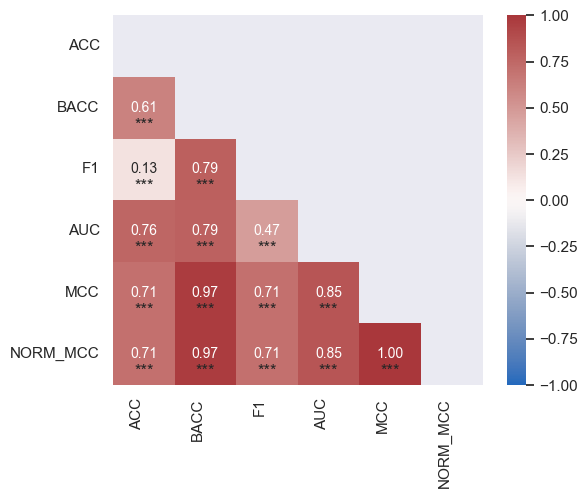

In [37]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

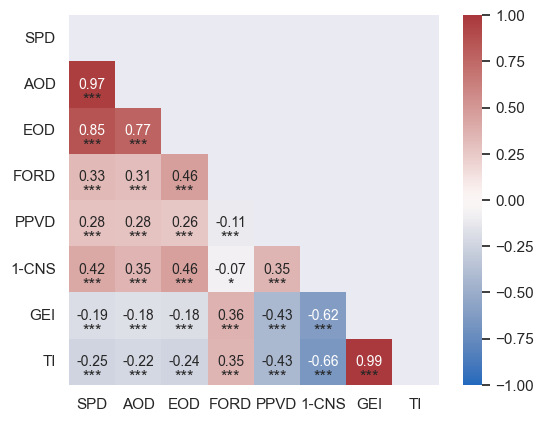

In [38]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

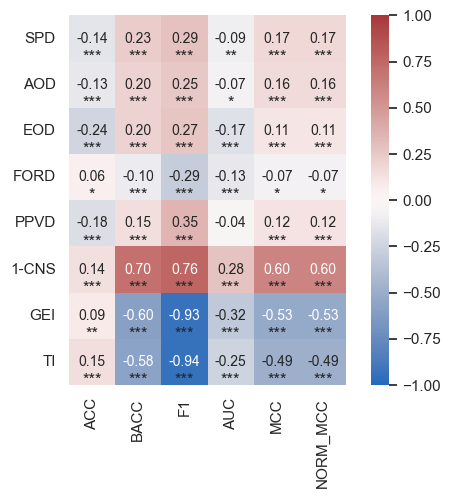

In [39]:
# original, spearman
g = corr_heatmap_with_significance_acc_fair(results_all_converted[accuracy_map+fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_fair_corr'+'.png', bbox_inches='tight')

### Changes of Metrics

In [40]:
df_metric_diff = get_df_metric_diff(results_all_converted, metric_list=accuracy_map+fairness_map)
df_metric_diff

,dataset,base_estimator,Bias_Mitigation,ACC,BACC,F1,AUC,MCC,NORM_MCC,SPD,AOD,EOD,FORD,PPVD,1-CNS,GEI,TI
0,dataset,TabTrans,RW,0.006,0.011363,0.034623,0.013362,0.029080,0.014540,-0.008322,-0.008785,-0.004559,-0.031337,-0.063427,0.0126,-0.006961,-0.012461
1,dataset,TabTrans,RW,-0.019,-0.005122,0.023373,0.000273,-0.014709,-0.007355,-0.016193,-0.016941,-0.015307,-0.028939,-0.047094,0.0064,-0.014103,-0.019276
2,dataset,TabTrans,RW,-0.001,0.012651,0.029396,0.003109,0.033209,0.016605,-0.006287,0.001602,-0.008759,0.008881,0.126663,-0.0068,-0.015633,-0.024537
3,dataset,TabTrans,RW,-0.011,-0.000515,0.017332,0.012311,0.011911,0.005955,-0.000938,-0.002846,0.005521,0.003889,0.069316,-0.0066,-0.010186,-0.015283
4,dataset,TabTrans,RW,-0.003,-0.005537,-0.002458,0.013362,-0.020728,-0.010364,0.009094,0.010635,0.000056,0.025441,-0.098702,0.0136,0.007472,0.007592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,dataset,TabTrans,AD,0.188,0.106809,0.096036,0.225997,0.285650,0.142825,0.019209,0.028164,0.009354,0.038622,0.008141,0.0402,0.026912,0.054834
16,dataset,TabTrans,AD,0.091,0.054088,0.093225,0.223731,0.206242,0.103121,0.032381,0.046757,-0.002385,0.016574,-0.003495,0.0210,0.007206,0.018947
17,dataset,TabTrans,AD,0.128,0.062673,-0.020452,0.276435,0.229817,0.114908,0.023925,0.054181,-0.051110,0.006230,-0.061200,-0.1216,0.010212,0.045593
18,dataset,TabTrans,AD,0.049,0.068040,0.223517,0.207281,0.251137,0.125568,0.032076,0.043393,0.002082,0.041429,0.018981,0.0588,-0.052080,-0.070732


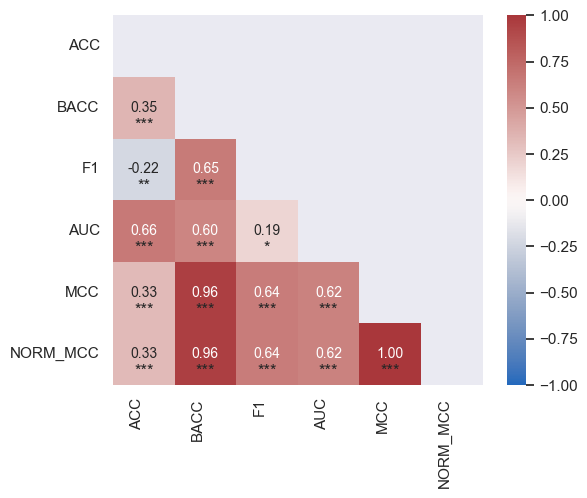

In [41]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_change_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])